In [1]:
import pandas as pd
import numpy as np
import torch
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('houseprice.csv')
df.shape

(1460, 81)

In [3]:
df=pd.read_csv('houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

In [4]:
df.shape

(1201, 10)

In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [7]:
df.describe()

,MSSubClass,LotFrontage,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,57.198168,70.049958,9951.698585,1970.580350,1158.437968,346.073272,180770.480433
std,43.106427,24.284752,7924.353975,31.750335,386.257235,435.143451,83389.519866
min,20.000000,21.000000,1300.000000,1872.000000,334.000000,0.000000,34900.000000
25%,20.000000,59.000000,7420.000000,1950.000000,876.000000,0.000000,127500.000000
50%,50.000000,69.000000,9262.000000,1972.000000,1082.000000,0.000000,159500.000000
75%,70.000000,80.000000,11249.000000,2003.000000,1383.000000,728.000000,213500.000000
max,190.000000,313.000000,215245.000000,2010.000000,4692.000000,2065.000000,755000.000000


In [8]:
for i in df.columns:
    print('column {} has {} values'.format(i, len(df[i].unique())))
    
    # here the mmzoning, street, lotshape are categorical value and others are continues values

column MSSubClass has 15 values
column MSZoning has 5 values
column LotFrontage has 110 values
column LotArea has 869 values
column Street has 2 values
column LotShape has 4 values
column YearBuilt has 112 values
column 1stFlrSF has 678 values
column 2ndFlrSF has 368 values
column SalePrice has 597 values


In [9]:
import datetime
datetime.datetime.now().year

2024

In [10]:
df = df.rename(columns= {'YearBuilt':'Total Years'})

In [11]:
for i in range(len(df['Total Years'])):
    df['Total Years'][i] = datetime.datetime.now().year - df['Total Years'][i]

KeyError: 7

In [12]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,Total Years,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,21,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,48,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,23,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,109,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,24,1145,1053,250000


In [13]:
# creating categorical features

cat_features = ['MSSubClass', 'MSZoning', 'Street', 'LotShape']
out_features = 'SalePrice'

In [14]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders = {}
lbl_encoders['MSSubClass'] = LabelEncoder()
lbl_encoders['MSSubClass'].fit_transform(df['MSSubClass'])

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [15]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [16]:
lbl_encoders = {}

for features in cat_features:
    lbl_encoders[features]=LabelEncoder()
    df[features] = lbl_encoders[features].fit_transform(df[features])

In [17]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,Total Years,1stFlrSF,2ndFlrSF,SalePrice
0,5,3,65.0,8450,1,3,21,856,854,208500
1,0,3,80.0,9600,1,3,48,1262,0,181500
2,5,3,68.0,11250,1,0,23,920,866,223500
3,6,3,60.0,9550,1,0,109,961,756,140000
4,5,3,84.0,14260,1,0,24,1145,1053,250000
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,1999,953,694,175000
1456,0,3,85.0,13175,1,3,1978,2073,0,210000
1457,6,3,66.0,9042,1,3,1941,1188,1152,266500
1458,0,3,68.0,9717,1,3,1950,1078,0,142125


In [18]:
### stacking and converting in tensors
# _____ VALUES ----> NUMPY ----> TORCH ----> TENSORS _________
cat_features = np.stack([df['MSSubClass'], df['MSZoning'], df['Street'], df['LotShape']], axis= 1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

In [19]:
#### converting numpy into tensors
# ------- NEVER CHANGE DTYPE OF CATEGORICAL VALUES INTO FLOAT -------- ######

cat_features = torch.tensor(cat_features, dtype= torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [20]:
cont_features = []
for i in df.columns:
    if i in ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'SalePrice']:
        pass
    else:
        cont_features.append(i)

In [21]:
cont_features

['LotFrontage', 'LotArea', 'Total Years', '1stFlrSF', '2ndFlrSF']

In [22]:
# _____ CONT-VALUES ----> NUMPY ----> TORCH ----> TENSORS ________
# stacking it!

cont_values = np.stack([df[i].values for i in cont_features], axis= 1)
cont_values = torch.tensor(cont_values, dtype=torch.float)

In [23]:
cont_values

tensor([[   65.,  8450.,    21.,   856.,   854.],
        [   80.,  9600.,    48.,  1262.,     0.],
        [   68., 11250.,    23.,   920.,   866.],
        ...,
        [   66.,  9042.,  1941.,  1188.,  1152.],
        [   68.,  9717.,  1950.,  1078.,     0.],
        [   75.,  9937.,  1965.,  1256.,     0.]])

In [24]:
cont_values.dtype

torch.float32

In [25]:
# depentent feature
y = torch.tensor(df['SalePrice'].values, dtype= torch.float).reshape(-1, 1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

#### embedding layers is only for categorical features
## embedding size for categorical columns

In [26]:
cat_dims = [len(df[col].unique()) for col in ['MSSubClass', 'MSZoning', 'Street', 'LotShape']]

In [27]:
cat_dims
# input dimensions

[15, 5, 2, 4]

In [28]:
## --thumb rule is that output dimension is based on the input dimension(min(50, unique values / 2))

embedding_dim = [(x, min(50, (x + 1) // 2)) for x in cat_dims]

In [29]:
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [30]:
import torch.nn as nn
import torch.nn.functional as F

In [31]:
embed_representation = nn.ModuleList([nn.Embedding(inp, out) for (inp, out) in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [32]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [33]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [34]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))
embedding_val

[tensor([[ 1.0838, -1.2799,  1.3361,  ...,  0.5473,  0.1226, -1.9235],
         [-0.7965, -0.1908, -0.1844,  ...,  1.0819,  0.8208,  1.0587],
         [ 1.0838, -1.2799,  1.3361,  ...,  0.5473,  0.1226, -1.9235],
         ...,
         [ 1.1349,  0.2774, -0.5403,  ...,  0.3591, -0.3699,  0.8540],
         [-0.7965, -0.1908, -0.1844,  ...,  1.0819,  0.8208,  1.0587],
         [-0.7965, -0.1908, -0.1844,  ...,  1.0819,  0.8208,  1.0587]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[-0.4164, -1.7454,  1.5620],
         [-0.4164, -1.7454,  1.5620],
         [-0.4164, -1.7454,  1.5620],
         ...,
         [-0.4164, -1.7454,  1.5620],
         [-0.4164, -1.7454,  1.5620],
         [-0.4164, -1.7454,  1.5620]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.7022],
         [0.7022],
         [0.7022],
         ...,
         [0.7022],
         [0.7022],
         [0.7022]], grad_fn=<EmbeddingBackward0>),
 tensor([[-1.7378,  0.4700],
         [-1.7378,  0.4700],
         [ 1.3624,  0.8180],

In [35]:
z = torch.cat(embedding_val, 1)
z

tensor([[ 1.0838, -1.2799,  1.3361,  ...,  0.7022, -1.7378,  0.4700],
        [-0.7965, -0.1908, -0.1844,  ...,  0.7022, -1.7378,  0.4700],
        [ 1.0838, -1.2799,  1.3361,  ...,  0.7022,  1.3624,  0.8180],
        ...,
        [ 1.1349,  0.2774, -0.5403,  ...,  0.7022, -1.7378,  0.4700],
        [-0.7965, -0.1908, -0.1844,  ...,  0.7022, -1.7378,  0.4700],
        [-0.7965, -0.1908, -0.1844,  ...,  0.7022, -1.7378,  0.4700]],
       grad_fn=<CatBackward0>)

In [36]:
dropout = nn.Dropout(.4)

In [37]:
final_embed = dropout(z)
final_embed

tensor([[ 0.0000, -0.0000,  2.2269,  ...,  0.0000, -2.8963,  0.7834],
        [-0.0000, -0.3180, -0.3073,  ...,  1.1703, -2.8963,  0.0000],
        [ 0.0000, -0.0000,  0.0000,  ...,  1.1703,  2.2707,  1.3633],
        ...,
        [ 1.8915,  0.4623, -0.9005,  ...,  1.1703, -0.0000,  0.7834],
        [-0.0000, -0.0000, -0.3073,  ...,  1.1703, -0.0000,  0.0000],
        [-1.3275, -0.0000, -0.0000,  ...,  1.1703, -2.8963,  0.7834]],
       grad_fn=<MulBackward0>)

In [38]:
## create a feed forward neural network

class FeedForwardNN(nn.Module):
    def __init__(self, embedding_dim, n_cont, out_sz, layers, p= 0.4):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp, out) for (inp, out) in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp, out in embedding_dim))
        n_in = n_emb + n_cont
        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace= True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1], out_sz))
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:, i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [39]:
len(cont_features)

5

In [40]:
torch.manual_seed(100)
model = FeedForwardNN(embedding_dim, len(cont_features), 1, [100, 50], p= 0.4)

In [41]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

### define loss and optimizer

In [42]:
model.parameters

<bound method Module.parameters of FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)>

In [43]:
loss_function = nn.MSELoss() #later will converted into Root mean squared error(RMSE)
optimizer = torch.optim.Adam(model.parameters(), lr= 0.01)

In [44]:
df.shape

(1201, 10)

In [45]:
cont_values

tensor([[   65.,  8450.,    21.,   856.,   854.],
        [   80.,  9600.,    48.,  1262.,     0.],
        [   68., 11250.,    23.,   920.,   866.],
        ...,
        [   66.,  9042.,  1941.,  1188.,  1152.],
        [   68.,  9717.,  1950.,  1078.,     0.],
        [   75.,  9937.,  1965.,  1256.,     0.]])

In [46]:
cont_values.shape

torch.Size([1201, 5])

In [47]:
# train test split
batch_size = 1200
test_size = int(batch_size * 0.15)
train_categorical = cat_features[:batch_size - test_size]
test_categorical = cat_features[batch_size - test_size : batch_size]
train_cont = cont_values[:batch_size - test_size]
test_cont = cont_values[batch_size - test_size : batch_size]
y_train = y[:batch_size - test_size]
y_test = y[batch_size - test_size : batch_size]

In [48]:
len(train_categorical), len(test_categorical), len(train_cont), len(test_cont), len(y_train), len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [49]:
epochs = 5000
final_losses = []
for i in range(epochs):
    i = i + 1
    y_pred = model(train_categorical, train_cont)
    loss = torch.sqrt(loss_function(y_pred, y_train))# RMSE
    final_losses.append(loss)
    if i % 10 == 1:
        print('epoch:-----  {}   _________  loss:-------  {}'.format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:-----  1   _________  loss:-------  200496.765625
epoch:-----  11   _________  loss:-------  200493.75
epoch:-----  21   _________  loss:-------  200489.46875
epoch:-----  31   _________  loss:-------  200483.03125
epoch:-----  41   _________  loss:-------  200473.71875
epoch:-----  51   _________  loss:-------  200462.09375
epoch:-----  61   _________  loss:-------  200446.78125
epoch:-----  71   _________  loss:-------  200430.09375
epoch:-----  81   _________  loss:-------  200408.296875
epoch:-----  91   _________  loss:-------  200384.390625
epoch:-----  101   _________  loss:-------  200355.640625
epoch:-----  111   _________  loss:-------  200322.4375
epoch:-----  121   _________  loss:-------  200291.203125
epoch:-----  131   _________  loss:-------  200251.984375
epoch:-----  141   _________  loss:-------  200206.3125
epoch:-----  151   _________  loss:-------  200161.359375
epoch:-----  161   _________  loss:-------  200111.046875
epoch:-----  171   _________  loss:----

epoch:-----  4281   _________  loss:-------  43921.734375
epoch:-----  4291   _________  loss:-------  39902.09375
epoch:-----  4301   _________  loss:-------  41520.46484375
epoch:-----  4311   _________  loss:-------  40581.328125
epoch:-----  4321   _________  loss:-------  40318.30078125
epoch:-----  4331   _________  loss:-------  40091.4296875
epoch:-----  4341   _________  loss:-------  39962.50390625
epoch:-----  4351   _________  loss:-------  43013.19140625
epoch:-----  4361   _________  loss:-------  41675.36328125
epoch:-----  4371   _________  loss:-------  39120.09765625
epoch:-----  4381   _________  loss:-------  38906.20703125
epoch:-----  4391   _________  loss:-------  38524.265625
epoch:-----  4401   _________  loss:-------  38115.37109375
epoch:-----  4411   _________  loss:-------  39240.1640625
epoch:-----  4421   _________  loss:-------  40091.421875
epoch:-----  4431   _________  loss:-------  38793.46484375
epoch:-----  4441   _________  loss:-------  38367.70

In [50]:
nmpy = torch.tensor(final_losses).detach().numpy()

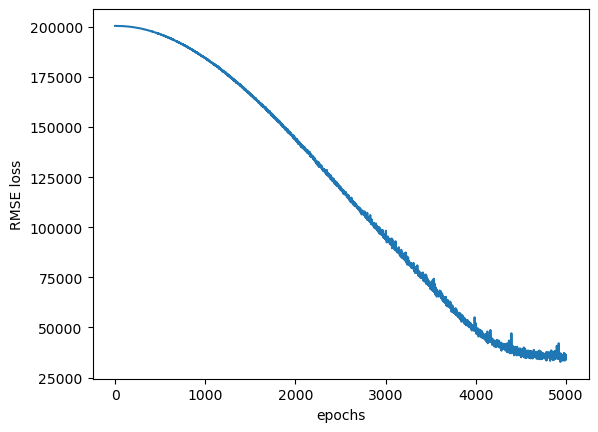

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), nmpy)
plt.ylabel('RMSE loss')
plt.xlabel('epochs');

In [52]:
# validate the test data
y_pred = ''
with torch.no_grad():
    y_pred = model(test_categorical, test_cont)
    loss = torch.sqrt(loss_function(y_pred, y_test))
print('RMSE: {}'.format(loss))

RMSE: 56874.49609375


In [53]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [54]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])
data_predicted

,Prediction
0,134603.171875
1,177940.640625
2,243667.468750
3,287231.000000
4,301599.500000
5,231548.953125
6,194346.984375
7,225998.328125
8,114874.304688
9,210178.828125


In [55]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,134603.171875,-4603.171875
1,138887.0,177940.640625,-39053.640625
2,175500.0,243667.468750,-68167.468750
3,195000.0,287231.000000,-92231.000000
4,142500.0,301599.500000,-159099.500000
